In [ ]:
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
cd drive/My\ Drive


In [ ]:
cd Colab\ Notebooks

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data/SBER_190101_210615.txt',parse_dates=[2])

FileNotFoundError: [Errno 2] No such file or directory: 'data/SBER_190101_210615.txt'

In [56]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,2019-01-03,0,186.37,191.50,186.00,186.99,40105780
1,SBER,D,2019-01-04,0,187.99,190.99,187.77,190.99,32537090
2,SBER,D,2019-01-08,0,191.66,193.18,190.37,191.24,38581950
3,SBER,D,2019-01-09,0,192.71,197.00,192.10,197.00,70633230
4,SBER,D,2019-01-10,0,196.30,197.64,195.03,196.75,56211650
...,...,...,...,...,...,...,...,...,...
611,SBER,D,2021-06-09,0,315.01,315.90,312.90,314.78,25115980
612,SBER,D,2021-06-10,0,314.80,316.58,313.76,314.62,29201370
613,SBER,D,2021-06-11,0,314.88,315.08,312.50,313.00,21902100
614,SBER,D,2021-06-14,0,313.48,314.87,310.40,314.12,25494830


In [57]:
df = df[['<DATE>','<CLOSE>']]

In [58]:
df.columns = ['ds','y']

In [59]:
df

,ds,y
0,2019-01-03,186.99
1,2019-01-04,190.99
2,2019-01-08,191.24
3,2019-01-09,197.00
4,2019-01-10,196.75
...,...,...
611,2021-06-09,314.78
612,2021-06-10,314.62
613,2021-06-11,313.00
614,2021-06-14,314.12


<AxesSubplot:>

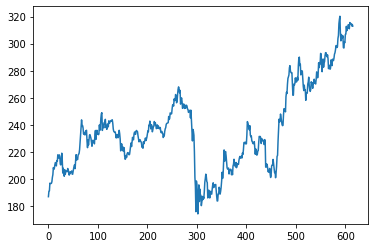

In [60]:
df.y.plot()

In [61]:
df.tail()

,ds,y
611,2021-06-09,314.78
612,2021-06-10,314.62
613,2021-06-11,313.00
614,2021-06-14,314.12
615,2021-06-15,312.96


In [62]:
df.set_index('ds', inplace=True)
df.sort_index(inplace=True)
print('Монотонность - ',df.index.is_monotonic)

Монотонность -  True


In [63]:
df.head()

,y
ds,
2019-01-03,186.99
2019-01-04,190.99
2019-01-08,191.24
2019-01-09,197.00
2019-01-10,196.75


In [ ]:
df.plot()

<AxesSubplot:xlabel='ds'>

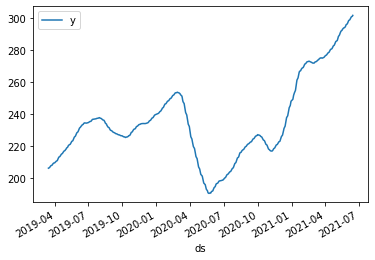

In [65]:
df.rolling(50).mean().plot()

In [6]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [7]:
make_features(df, 7, 3)

NameError: name 'df' is not defined

In [69]:
df.dropna(inplace=True)

In [70]:
df

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2019-01-15,198.00,2019,1,15,1,0,196.80,196.80,196.75,197.00,191.24,190.99,186.99,196.783333
2019-01-16,201.26,2019,1,16,2,0,198.00,196.80,196.80,196.75,197.00,191.24,190.99,197.200000
2019-01-17,203.32,2019,1,17,3,0,201.26,198.00,196.80,196.80,196.75,197.00,191.24,198.686667
2019-01-18,208.44,2019,1,18,4,0,203.32,201.26,198.00,196.80,196.80,196.75,197.00,200.860000
2019-01-21,207.17,2019,1,21,0,0,208.44,203.32,201.26,198.00,196.80,196.80,196.75,204.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09,314.78,2021,6,9,2,0,314.83,315.53,310.94,312.41,313.98,311.60,310.79,313.766667
2021-06-10,314.62,2021,6,10,3,0,314.78,314.83,315.53,310.94,312.41,313.98,311.60,315.046667
2021-06-11,313.00,2021,6,11,4,0,314.62,314.78,314.83,315.53,310.94,312.41,313.98,314.743333


In [ ]:
df

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
features = df.drop(['y'],axis = 1)
target = df['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (548, 13)
X_test (61, 13)


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [74]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [75]:
y_predicted_lr = model_lr.predict(X_test)

In [76]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))


RMSE тестовой выборки LinearRegression:  3.900656144344142


In [77]:
df.tail()

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2021-06-09,314.78,2021,6,9,2,0,314.83,315.53,310.94,312.41,313.98,311.60,310.79,313.766667
2021-06-10,314.62,2021,6,10,3,0,314.78,314.83,315.53,310.94,312.41,313.98,311.60,315.046667
2021-06-11,313.00,2021,6,11,4,0,314.62,314.78,314.83,315.53,310.94,312.41,313.98,314.743333
2021-06-14,314.12,2021,6,14,0,0,313.00,314.62,314.78,314.83,315.53,310.94,312.41,314.133333
2021-06-15,312.96,2021,6,15,1,0,314.12,313.00,314.62,314.78,314.83,315.53,310.94,313.913333


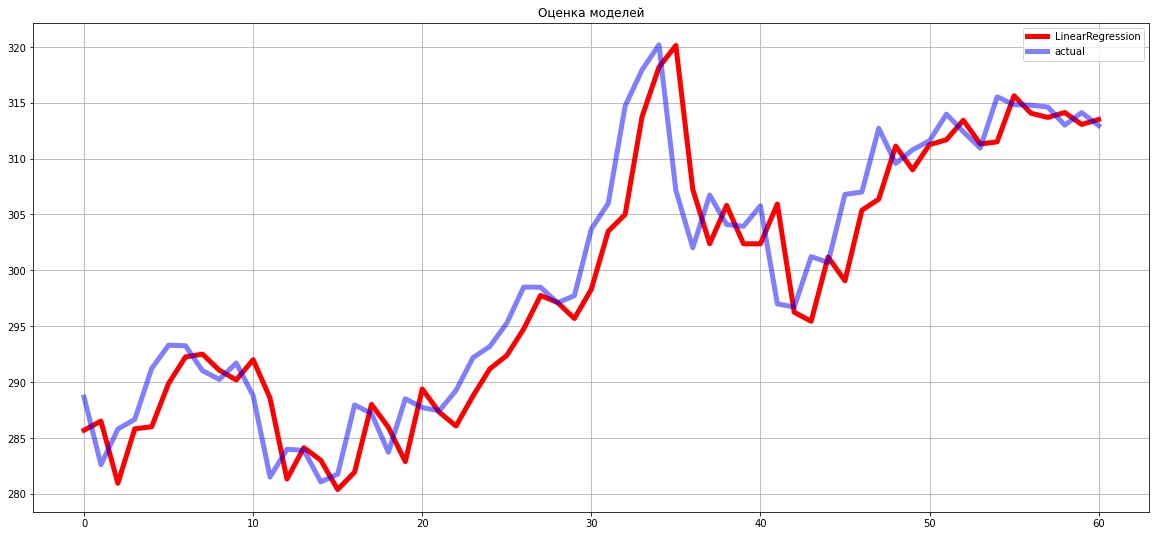

In [78]:
plt.figure(figsize=(20, 9))
plt.plot(y_predicted_lr, "r",linewidth=5, label="LinearRegression")
plt.plot(y_test.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

In [79]:
from prophet import Prophet
m = Prophet()

In [80]:
df_prophet = df[['y']]

In [81]:
df_prophet.reset_index(inplace=True)

In [82]:
df_prophet

,ds,y
0,2019-01-15,198.00
1,2019-01-16,201.26
2,2019-01-17,203.32
3,2019-01-18,208.44
4,2019-01-21,207.17
...,...,...
604,2021-06-09,314.78
605,2021-06-10,314.62
606,2021-06-11,313.00
607,2021-06-14,314.12


In [83]:
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.63455


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1727.18     0.0589273       445.513           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1745.42    0.00501214       329.083           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       1748.09   9.50476e-05       93.9248   5.137e-07       0.001      332  LS failed, Hessian reset 
     299       1757.03    0.00416251       612.849           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       1762.22   9.84557e-05       121.004   5.638e-07       0.001      559  LS failed, Hessian reset 
     399       1762.66   0.000580254       107.236           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha

In [84]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
609,2021-06-16
610,2021-06-17
611,2021-06-18
612,2021-06-19
613,2021-06-20


In [85]:
forecast = m.predict(future)

In [86]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-15,192.287423,199.569579,222.854051,192.287423,192.287423,18.912903,18.912903,18.912903,1.680496,1.680496,1.680496,17.232407,17.232407,17.232407,0.0,0.0,0.0,211.200327
1,2019-01-16,192.682953,200.827900,223.568811,192.682953,192.682953,19.117230,19.117230,19.117230,2.027618,2.027618,2.027618,17.089611,17.089611,17.089611,0.0,0.0,0.0,211.800183
2,2019-01-17,193.078483,199.029141,222.699813,193.078483,193.078483,18.178029,18.178029,18.178029,1.303664,1.303664,1.303664,16.874366,16.874366,16.874366,0.0,0.0,0.0,211.256512
3,2019-01-18,193.474013,200.384875,222.663186,193.474013,193.474013,17.685566,17.685566,17.685566,1.096401,1.096401,1.096401,16.589165,16.589165,16.589165,0.0,0.0,0.0,211.159579
4,2019-01-21,194.660602,199.302744,223.262892,194.660602,194.660602,16.472258,16.472258,16.472258,1.110670,1.110670,1.110670,15.361588,15.361588,15.361588,0.0,0.0,0.0,211.132860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2021-06-16,313.198124,310.192421,333.119434,313.198124,313.198124,8.079071,8.079071,8.079071,2.027618,2.027618,2.027618,6.051452,6.051452,6.051452,0.0,0.0,0.0,321.277195
610,2021-06-17,313.532840,309.631374,332.025802,313.532840,313.532840,7.190531,7.190531,7.190531,1.303664,1.303664,1.303664,5.886867,5.886867,5.886867,0.0,0.0,0.0,320.723371
611,2021-06-18,313.867556,308.847422,332.154518,313.867556,313.867556,6.787803,6.787803,6.787803,1.096401,1.096401,1.096401,5.691402,5.691402,5.691402,0.0,0.0,0.0,320.655360
612,2021-06-19,314.202272,297.971309,322.232347,314.202272,314.202272,-4.195554,-4.195554,-4.195554,-9.666281,-9.666281,-9.666281,5.470727,5.470727,5.470727,0.0,0.0,0.0,310.006718


In [87]:


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
607,2021-06-14,319.906292,308.668274,332.336057
608,2021-06-15,320.723685,309.314850,331.884377
609,2021-06-16,321.277195,310.192421,333.119434
610,2021-06-17,320.723371,309.631374,332.025802
611,2021-06-18,320.655360,308.847422,332.154518
612,2021-06-19,310.006718,297.971309,322.232347
613,2021-06-20,322.215074,310.253608,333.718311


<AxesSubplot:>

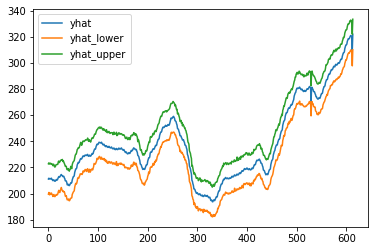

In [89]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot()

In [90]:
forecast.set_index('ds',inplace=True)

In [91]:
forecast['yhat'].tail(7)

ds
2021-06-14    319.906292
2021-06-15    320.723685
2021-06-16    321.277195
2021-06-17    320.723371
2021-06-18    320.655360
2021-06-19    310.006718
2021-06-20    322.215074
Name: yhat, dtype: float64

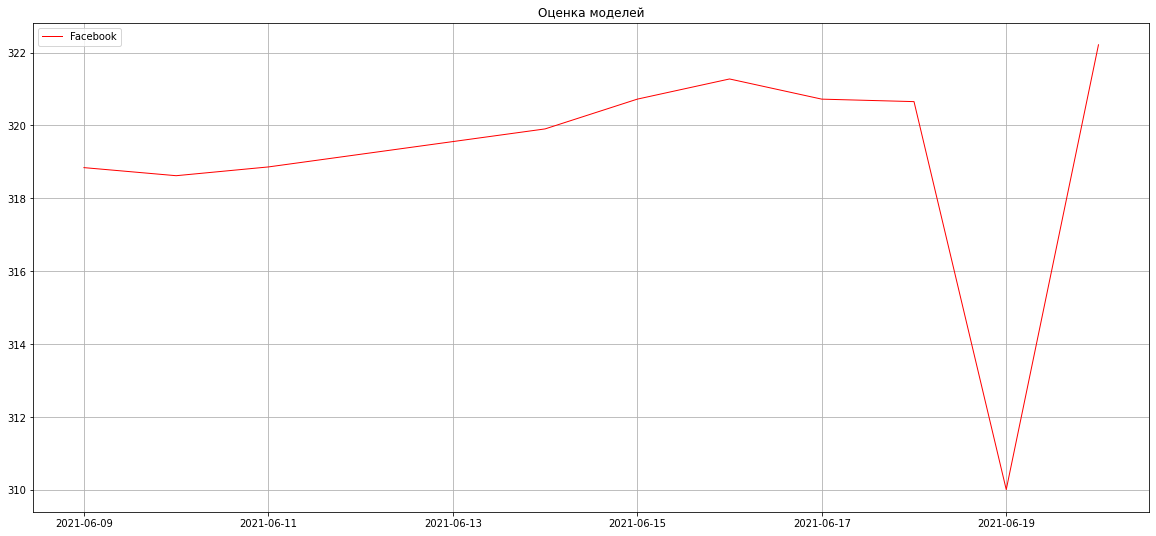

In [93]:
plt.figure(figsize=(20, 9))
plt.plot(forecast['yhat'].tail(10), "r",linewidth=1, label="Facebook")

# plt.plot(df.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);